# Ejercicio 1

## Item A

Vamos a crear un algoritmo que sea un Generador Congruencial Lineal (GCL). El codigo utilizado es el siguiente

In [1]:
import matplotlib.pyplot as plt
import numpy as np
SEMILLA = (99730+100866+96786+93762)//4

def GCL(n,Xo,incremento, modulo, multiplicador):
    """Recibe como parametro cinco enteros, numero de iteraciones n, semilla Xo,
    , incremnto, modulo y multiplicador. Imprime el valor de cada iteracion"""
    resultados = [Xo]
    for i in range(n):
        resultados.append((resultados[i]*multiplicador + incremento) % modulo)   
    resultados.pop(0)
    return resultados

Importamos la libreria necesaria y utilizamos la semilla que es el promedio de nuestro padrones. El resultado de los 10 primeros numeros son:

In [2]:
resultado = GCL(10,SEMILLA,1664525, 2**32, 1013904223)
for n in range(10):
    print('El numero '+str(n+1)+' es: '+ str(resultado[n]))

El numero 1 es: 614953939
El numero 2 es: 3319310938
El numero 3 es: 1608518515
El numero 4 es: 512085690
El numero 5 es: 3269962515
El numero 6 es: 832498458
El numero 7 es: 1617449651
El numero 8 es: 1245314938
El numero 9 es: 4153147987
El numero 10 es: 921504730


## Item B

El algoritmo utilizado es similar al anterior, la diferencia es que vamos a utilizar el modulo del algoritmo para obtener un rango de numeros generados al azar acotado entre 0 y 1

In [3]:
def GCL_con_rango(n,Xo,incremento, modulo, multiplicador):
    """Recibe como parametro cinco enteros, numero de iteraciones n, semilla Xo,
    , incremnto, modulo y multiplicador. 
    Los numeros random generados estan entre 0 y 1.
    Imprime el valor de cada iteracion"""
    resultados = [Xo]
    for i in range(n):
        resultados.append(((resultados[i]*multiplicador + incremento) % modulo))  
    resultados.pop(0)
    for i in range(n):
        resultados[i] = resultados[i]/modulo   
    return resultados

Mostramos tambien los primeros 10 numeros generados con esta modificacion.

In [4]:
resultado = GCL_con_rango(10,SEMILLA,1664525, 2**32, 1013904223)
for n in range(10):
    print('El numero '+str(n+1)+' es: '+ str(resultado[n]))

El numero 1 es: 0.14318012143485248
El numero 2 es: 0.7728373021818697
El numero 3 es: 0.37451240117661655
El numero 4 es: 0.11922924080863595
El numero 5 es: 0.7613474770914763
El numero 6 es: 0.19383115181699395
El numero 7 es: 0.3765918433200568
El numero 8 es: 0.28994747856631875
El numero 9 es: 0.966980119002983
El numero 10 es: 0.21455453941598535


## Item C

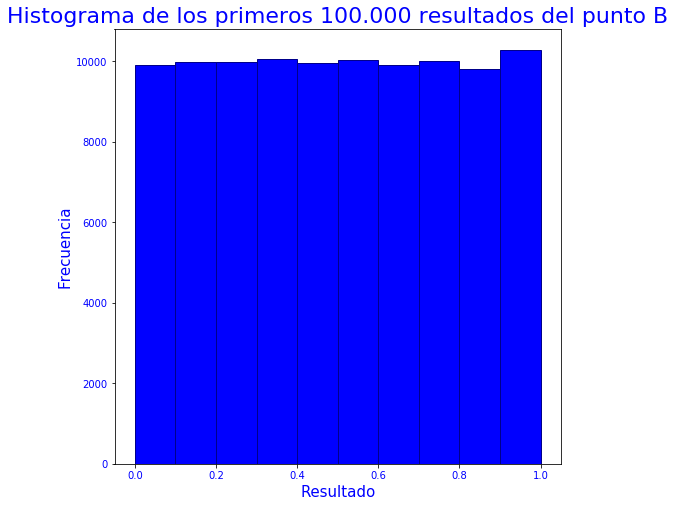

In [5]:
plt.rcParams["figure.figsize"] = (8,8)
plt.hist(GCL_con_rango(100000,SEMILLA,1664525, 2**32, 1013904223), histtype='bar',
         edgecolor='darkblue',color='blue')
title_obj = plt.title('Histograma de los primeros 100.000 resultados del punto B')                
plt.getp(title_obj, 'text')            
plt.setp(title_obj, color='blue', size=22)
plt.xlabel('Resultado', fontsize=15).set_color("blue")
plt.ylabel('Frecuencia', fontsize=15).set_color("blue")
plt.xticks(color="blue")
plt.yticks(color="blue")
plt.show()

Podemos observar que el algoritmo utilizado tiene una ditribucion similar a una uniforme por lo que es bueno.

# Ejercicio 2

## Item A

Definimos el espacio muestral: S={2,3,4,5,6,7,8,9,10,11,12}

## Item B

Utilizando las funciones del ejercicio 1, creamos una nueva funcion para simular la tirada de dos dados

In [6]:
SEMILLA = (99730+100866+96786+93762)//4

def GCL(n,Xo,incremento, modulo, multiplicador):
    resultados = [Xo]
    for i in range(n):
        resultados.append((resultados[i]*multiplicador + incremento) % modulo)
    resultados.pop(0)
    return resultados

def GCL_con_rango(n,Xo,incremento, modulo, multiplicador):
    resultados = GCL(n,Xo,incremento,modulo,multiplicador);
    for i in range(n):
        resultados[i] = resultados[i]/modulo
    return resultados

In [7]:
def simular_dado(Xo):
    if ( 0<Xo<=1/6 ):
        return 1
    elif ( 1/6<Xo<=2/6 ):
        return 2
    elif ( 2/6<Xo<=3/6 ):
        return 3
    elif ( 3/6<Xo<=4/6 ):
        return 4
    elif ( 4/6<Xo<=5/6 ):
        return 5
    else:
        return 6


def simular_tiradas(n):
    tiradas = GCL_con_rango(n,SEMILLA,1664525, 2**32, 1013904223)
    dados = []
    for i in range(0,n,2):
        dados.append((simular_dado(tiradas[i]),simular_dado(tiradas[i+1])))
    return dados

Con las funciones definidas, simulamos las tiradas

In [8]:
tiradas = simular_tiradas(20000)

Imprimimos los primeros 10 pares:

In [9]:
for n in range(10):
    print('El par generado numero '+str(n+1)+' es: '+ str(tiradas[n]))

El par generado numero 1 es: (1, 5)
El par generado numero 2 es: (3, 1)
El par generado numero 3 es: (5, 2)
El par generado numero 4 es: (3, 2)
El par generado numero 5 es: (6, 2)
El par generado numero 6 es: (4, 4)
El par generado numero 7 es: (2, 4)
El par generado numero 8 es: (2, 4)
El par generado numero 9 es: (4, 2)
El par generado numero 10 es: (4, 5)


## Item C

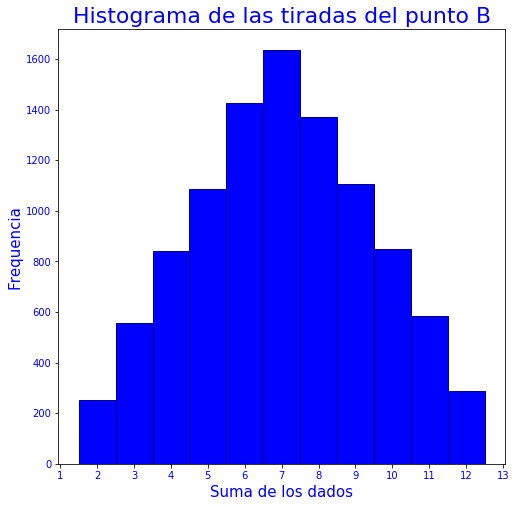

In [10]:
tiradas = simular_tiradas(20000)
sumas = [tirada[0] + tirada[1] for tirada in tiradas]
ticksx = list(range(14))
title_obj = plt.title("Histograma de las tiradas del punto B")                
plt.getp(title_obj, 'text')            
plt.setp(title_obj, color='blue', size=22)
plt.xlabel('Suma de los dados', fontsize=15).set_color("blue")
plt.ylabel('Frequencia', fontsize=15).set_color("blue")
plt.xticks(ticksx, color="blue")
plt.yticks(color="blue")
bins = np.arange(1.5,13.5,1)
plt.hist(sumas, bins=bins,histtype='bar', edgecolor='darkblue',color='blue');

# Ejercicio 3

## Item A

Comenzamos importando las librerias necesarias y definiendo la funcion que vamos a graficar.

In [11]:
import numpy as np
import matplotlib.pyplot as plt

In [12]:
def f(x):
    if (x < (-np.pi / 2)) or (x > np.pi/2):
        return 0.
    else:
        return (13/(12*np.pi) - (1/(np.pi**3)) * x**2)

f = np.vectorize(f)

El grafico de la funcion densidad es el siguiente:

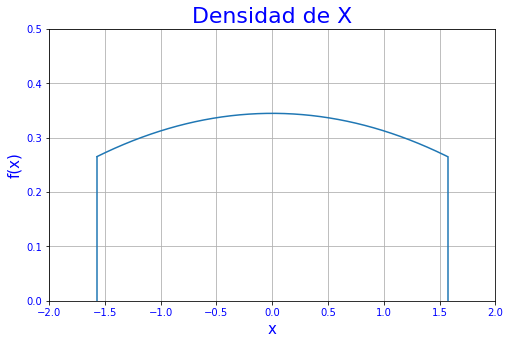

In [13]:
plt.rcParams["figure.figsize"] = (8,8)
dt = 0.01
plt.figure(figsize=[8,5])
x = np.arange(-np.pi/2,np.pi/2,dt)
plt.plot(x,f(x))

plt.axvline(-np.pi/2,0,f(-np.pi/2)/0.5)
plt.axvline(np.pi/2,0,f(np.pi/2)/0.5)

plt.axis([-2,2,0,0.5])
title_obj = plt.title("Densidad de X")                
plt.getp(title_obj, 'text')            
plt.setp(title_obj, color='blue', size=22)
plt.xlabel('x', fontsize=15).set_color("blue")
plt.ylabel('f(x)', fontsize=15).set_color("blue")
plt.xticks(color="blue")
plt.yticks(color="blue")


plt.grid(True)

## Item B

La funcion de densidad de probabilidad es, integramos la funcion para encontrar la funcion de probabilidad acumulada y luego su inversa :
<br>
$$
    f_X(x) = \begin{cases}
                \frac{13}{12\pi} - \frac{x^2}{\pi^3},\quad -\frac{\pi}{2} \leq x \leq \frac{\pi}{2} \\
                0, \quad \text{otro caso }\\
            \end{cases}
$$
<br>
$$
    F_X(x) = \int_{-\infty}^{x}f_X(t) dt = \int_{-\frac{\pi}{2}}^{x} \frac{13}{12\pi} - \frac{t^2}{\pi^3} dt\\
$$
<br>
$$
    \implies F_X(x) =  \frac{13 t}{12\pi} - \frac{t^3}{3\pi^3} \big|_{\frac{-\pi}{2}}^x \\
$$
<br>
$$
     \implies F_X(x) = \frac{13 x}{12\pi} - \frac{x^3}{3\pi^3} + \frac{13}{24} - \frac{1}{24} = \frac{13 x}{12\pi} - \frac{x^3}{3\pi^3} + \frac{1}{2} 
$$
<br>


In [14]:
def F(x):
    if (x < -np.pi/2):
        return 0.
    if (x > np.pi/2):
        return 1.
    return (13*x / (12*np.pi)) - (x**3)/(3*np.pi**3) + 1/2

F = np.vectorize(F)

dt=0.01
rango_muestras = np.arange(-np.pi/2,np.pi,dt)
muestras = F(rango_muestras)

Ahora para la inversa se invierten los ejes y se interpolan las muestras tomadas para calcular la inversa en un punto en [0,1]

In [15]:
def Finv(u):
    t = -np.pi/2
    i=1
    m = muestras[1]
    m_ant = muestras[0]
    while (m < u):
        t+=dt
        m_ant = m
        i+=1
        m = muestras[i]
        
    inv = (t-dt) + dt*(u-m_ant)/(m - m_ant)
    return inv

Finv = np.vectorize(Finv)

Graficamos la funcion de probabilidad acumulada:

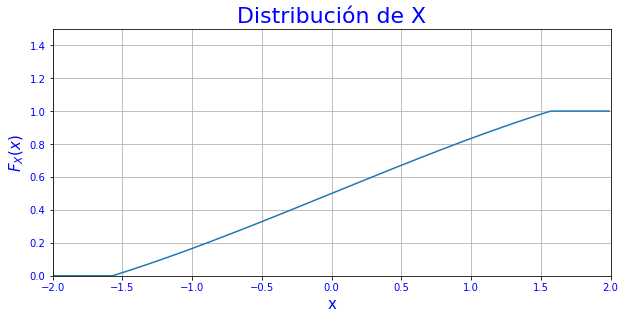

In [16]:
plt.figure(figsize=[10,10])
x = np.arange(-2,2,dt)

plt.subplot(211)
plt.plot(x,F(x))
plt.axis([-2,2,0,1.5])
title_obj = plt.title("Distribución de X")                
plt.getp(title_obj, 'text')            
plt.setp(title_obj, color='blue', size=22)
plt.xlabel("x", fontsize=15).set_color("blue")
plt.ylabel("$F_X(x)$", fontsize=15).set_color("blue")
plt.xticks(color="blue")
plt.yticks(color="blue")

plt.grid(True)

Graficamos la inversa de la funcion de probabilidad acumulada:

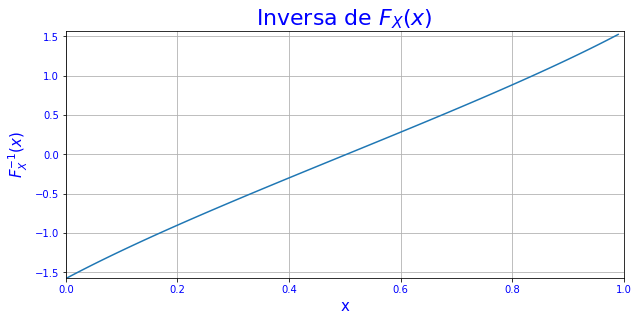

In [17]:
plt.figure(figsize=[10,10])
u = np.arange(0,1,0.01)
plt.subplot(212)
plt.plot(u,Finv(u))
plt.axis([0,1,-np.pi/2,np.pi/2])

title_obj = plt.title("Inversa de $F_X(x)$")                
plt.getp(title_obj, 'text')            
plt.setp(title_obj, color='blue', size=22)
plt.xlabel("x", fontsize=15).set_color("blue")
plt.ylabel("$F_X^{-1}(x)$", fontsize=15).set_color("blue")
plt.xticks(color="blue")
plt.yticks(color="blue")


plt.grid(True)

## Item C

In [18]:
N = int(1e5)
U = GCL_con_rango(N,SEMILLA,1664525, 2**32, 1013904223)
Xgen = Finv(U)

## Item D

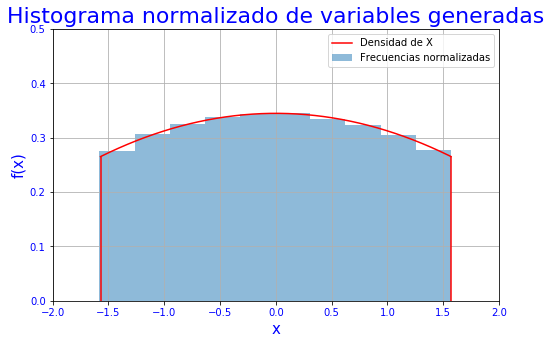

In [19]:
dt = 0.01
plt.figure(figsize=[8,5])
x = np.arange(-np.pi/2,np.pi/2,dt)
plt.plot(x,f(x),'r',label="Densidad de X")

plt.axvline(-np.pi/2,0,f(-np.pi/2)/0.5,c='r')
plt.axvline(np.pi/2,0,f(np.pi/2)/0.5,c='r')

plt.axis([-2,2,0,0.5])

title_obj = plt.title("Histograma normalizado de variables generadas")                
plt.getp(title_obj, 'text')            
plt.setp(title_obj, color='blue', size=22)
plt.xlabel("x", fontsize=15).set_color("blue")
plt.ylabel("f(x)", fontsize=15).set_color("blue")
plt.xticks(color="blue")
plt.yticks(color="blue")

plt.grid(True)
hist = plt.hist(Xgen,density=True,alpha=0.5,label="Frecuencias normalizadas")

plt.legend()


plt.show()

# Ejercicio 4

## Item A y B

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

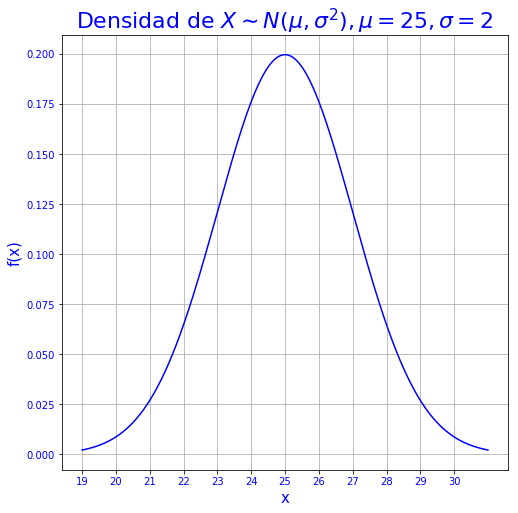

In [21]:
mu = 25
sigma = 2
x = np.arange(mu-3*sigma,mu+3*sigma,0.001)
xticks = np.arange(19,31,1)
normal = norm(mu,sigma)
plot = plt.plot(x,normal.pdf(x), color = 'blue')
title_obj = plt.title("Densidad de $X\sim N(\mu,\sigma^2), \mu=25,\sigma=2$")                
plt.getp(title_obj, 'text')            
plt.setp(title_obj, color='blue', size=22)
plt.xlabel("x", fontsize=15).set_color("blue")
plt.ylabel("f(x)", fontsize=15).set_color("blue")
plt.xticks(xticks, color="blue")
plt.yticks(color="blue")

plt.grid(True)

## Item C

Considerando que para una distribución normal aproximadamente el 99.7% de la probabilidad se concentra en el intervalo $[\mu-3\sigma,\mu+3\sigma]$, supondremos para nuestro algoritmo que la variable aleatoria está restringida a ese intervalo ([19,31] con los datos del enunciado).

In [22]:
def aceptacionRechazo(n):
    gen = np.zeros(n)
    for i in range(0,n):
        accept = False
        while not accept:
            U1 = np.random.rand()*6*sigma + mu - 3*sigma
            U2 = np.random.rand()*maximo
            if (U2 < normal.pdf(U1)):
                gen[i] = U1
                accept = True
    return gen

In [23]:
maximo = normal.pdf(mu)
N = int(1e5)
generados = aceptacionRechazo(N)

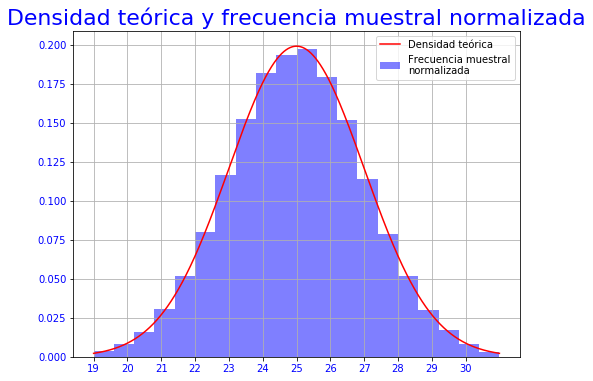

In [24]:
plt.figure(figsize=[8,6])
x = np.arange(mu-3*sigma,mu+3*sigma,0.001)
xticks = np.arange(19,31,1)
normal = norm(mu,sigma)
plot = plt.plot(x,normal.pdf(x),c='r',label="Densidad teórica")
plt.xticks(xticks)
plt.hist(generados,bins=20,density=True,color='b',alpha=0.5,
         label="Frecuencia muestral\nnormalizada")

title_obj = plt.title("Densidad teórica y frecuencia muestral normalizada")                
plt.getp(title_obj, 'text')            
plt.setp(title_obj, color='blue', size=22)
plt.xticks(xticks, color="blue")
plt.yticks(color="blue")


plt.legend(loc='best')
plt.grid(True)
plt.show()

## Item D

Realizamos las comparaciones pedidas

In [25]:
media_muestral = sum(generados)/N
varianza_muestral = sum((generados - media_muestral)**2) / N

print("Media muestral: %5.5f."%media_muestral)
print("Varianza muestral: %5.5f"%varianza_muestral)

Media muestral: 24.99171.
Varianza muestral: 3.90956


In [26]:
Er_media = abs(media_muestral - mu) / mu
Er_var = abs(varianza_muestral - sigma**2) / sigma**2
print("Error relativo en la media muestral: %5.5f."%Er_media)
print("Error relativo en la varianza muestral: %5.5f"%Er_var)

Error relativo en la media muestral: 0.00033.
Error relativo en la varianza muestral: 0.02261


# Ejercicio 5

In [27]:
#FALTA

# Ejercicio 6

Utilizamos las funciones definidas en el ejercicio 2

In [28]:
from scipy.stats import chi2,chisquare
import random

In [29]:
def GCL_con_rango(n,Xo,incremento, modulo, multiplicador):
    """Recibe como parametro cinco enteros, numero de iteraciones n, semilla Xo,
    , incremnto, modulo y multiplicador. 
    Los numeros random generados estan entre 0 y 1.
    Imprime el valor de cada iteracion"""
    resultados = [Xo]
    for i in range(n):
        resultados.append(((resultados[i]*multiplicador + incremento) % modulo))  
    resultados.pop(0)
    for i in range(n):
        resultados[i] = resultados[i]/modulo   
    return resultados

def simular_dado(Xo):
    resultado_dado=GCL_con_rango(10,Xo,1664525, 2**32, 1013904223)[0]
    if ( 0<resultado_dado<=1/6 ):
        resultado_dado=1
    elif ( 1/6<resultado_dado<=2/6 ):
        resultado_dado=2
    elif ( 2/6<resultado_dado<=3/6 ):
        resultado_dado=3
    elif ( 3/6<resultado_dado<=4/6 ):
        resultado_dado=4
    elif ( 4/6<resultado_dado<=5/6 ):
        resultado_dado=5
    else:
        resultado_dado=6
    return resultado_dado


def simular_dados(n):
    tiradas=[]
    for i in range(1,n+1):
        tiradas.append((simular_dado(int(random.randrange(1000))),simular_dado(int(random.randrange(1000)))))
    return tiradas

In [30]:
N = int(1e5)
tiradas = list(map(lambda x: x[0]+x[1], simular_dados(N)))

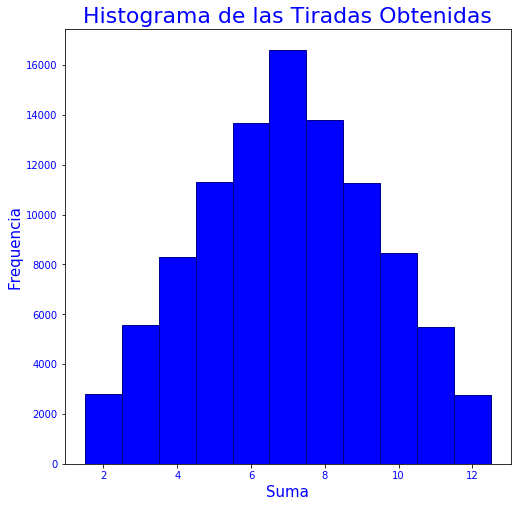

In [31]:
bins = np.arange(1.5,13.5,1)
hist = plt.hist(tiradas,bins=bins,histtype='bar', edgecolor='darkblue',color='blue')
title_obj = plt.title("Histograma de las Tiradas Obtenidas")                
plt.getp(title_obj, 'text')            
plt.setp(title_obj, color='blue', size=22)
plt.xticks(color="blue")
plt.yticks(color="blue")
plt.xlabel("Suma", fontsize=15).set_color("blue")
plt.ylabel("Frequencia", fontsize=15).set_color("blue");

Las frecuencias normalizadas que se desearían para cada posible valor de una tirada están la siguiente tabla

<img src="./dados.jpg" style="width:500px"/>

Se tiene la fórmula para el test:

$$
    D^2 = \sum_{s=1}^k \frac{ (Y_s - n p_s )^2}{n p_s} \\
    Y_s :\text{Frecuencia observada}, \quad n p_s: \text{ Frecuencia esperada }, \quad k: \text{clases,buckets,etc}
$$

y nos plantean tomar un nivel de significación de 1% es decir, $\alpha = 0.01$

In [32]:
f_teo = np.array([1,2,3,4,5,6,5,4,3,2,1])/36 * len(tiradas)
f_obs = hist[0]
f_obs

array([ 2804.,  5555.,  8312., 11300., 13660., 16619., 13787., 11252.,
        8465.,  5496.,  2750.])

In [33]:
chi_test = chisquare(f_obs,f_teo)

In [34]:
msj = "El test de Chi^2 devolvio un estadístico D = {0}, correspondiente al valor p = {1}"\
    .format(chi_test[0] , chi_test[1])
print(msj)

El test de Chi^2 devolvio un estadístico D = 12.952208, correspondiente al valor p = 0.22635621298783457


El test de $\chi^2$ nos devolvió un estadístico $D^2$ cuyo valor P asociado es mayor que el nivel de significación elegido. Por lo tanto, la distribución es aceptada. Para cambiar el resultado del test de hipótesis deberíamos tomar cualquier nivel de significación mayor al valor P obtenido ($\alpha\in(pValue,1)$)
$$
$$

# Ejercicio 7

Aplicamos el test de Kolmogorov-Smirnov al generador del ejercicio 4 por lo que vamos a utilizar funciones definidar en el ejercicio 4. Recordamos:

In [35]:
def aceptacionRechazo(n):
    gen = np.zeros(n)
    for i in range(0,n):
        accept = False
        while not accept:
            U1 = np.random.rand()*6*sigma + mu - 3*sigma
            U2 = np.random.rand()*maximo
            if (U2 < normal.pdf(U1)):
                gen[i] = U1
                accept = True
    return gen

In [ ]:
N = int(1e5)
generados = aceptacionRechazo(N)
ordenados = np.sort(generados)

In [ ]:
q = 0
i = 0
while i < N:
    x = ordenados[i]
    if abs(i/N - normal.cdf(x)) > q:
        max_x = x
        q = abs(i/N - normal.cdf(x))
    i+=1

In [ ]:
print('q es: '+ str(q))
print('El max es: '+ str(max_x))

Nos proponen un nivel de significación $\alpha = 0.01$. Aceptaremos la distribución si:
<br><br>
$$
    q \gt \sqrt{\frac{-1}{2N}\ln{\frac{\alpha}{2}}} = \text{umbral}
$$

In [ ]:
alpha = 0.01
umbral = np.sqrt(-1/(2*N) * np.log(alpha/2))
print('El umbral es: ' +str(umbral))

Finalmente

In [ ]:
if q > umbral:
    print("La distribución es aceptada por el test")
else:
    print("La distribución es rechazada por el test")

# Ejercicio 8

# Ejercicio 9

# Ejercicio 10